# Question 2B: Finite Difference Method

Given the second order differential equation function.

$$ \frac{d^2y}{dx^2} = f(x, y , \frac{dy}{dx} )$$
$$ \frac{d^2y}{dx^2} = y'' = 6x - \frac{1}{2}x^2 $$

The Boundary value problem:

$$ y(0) = 0, \ and \ y(12) = 0 $$

The step size $h=0.1$ the actual $y(x)$ is unknown, we wish to find $y(4)$.

$$ y'' = \frac{y_{n+1} - 2y_n + y_{n-1}}{h^2}  \quad \ (from \ central \ difference) (1) $$
$$ y' = \frac{y_{n+1} - y_n}{h} \ quad \ (From \ Forward \ Euler) \ (2) $$



So using (1) we get:

$$ \frac{y_{n+1} - 2y_n + y_{n-1}}{h^2} = 6x_n - \frac{1}{2}x_n^2  \quad (3)$$

We are using $h=4$, so (3) becomes,

$$ y_{n+1} - 2y_n + y_{n-1} = 96x_n - 8x_n^2  \quad (4)$$

$$y_0 = 0$$                
$$y_2 - 2y_1 + y_0 = 256$$ 
$$y_3 -2y_2 + y_1 = 256$$
$$y_3 = 0$$


$$
\begin{equation*}
\begin{bmatrix}
1 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 \\
0 & 1 & -2 & 1 \\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
y_3 
\end{bmatrix}
= \begin{bmatrix}
0 \\
256  \\
256 \\
0
\end{bmatrix}
\end{equation*}
$$




In [10]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## Discrete Interval 
Here we will use a step sizes on the  $ 0 \leq x \leq 12 $.
### Interval
The step Size will be $h_{1} = 0.1

with the discrete time steps,
$$ x_{i} = 0 + 0.1i $$
for  $i=0,1,...,120$.



0.1


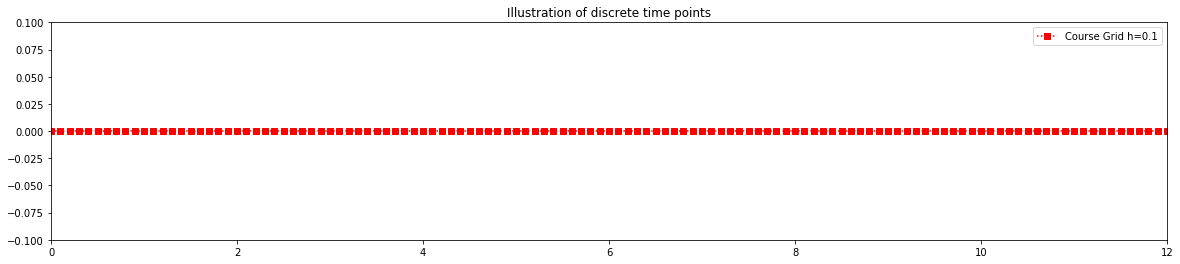

In [11]:
# Start and end of interval
b=12
a=0

N1=120

h1=((b-a)/N1)
print(h1)

x1=np.arange(a,b+h1,h1)


fig = plt.figure(figsize=(20,4))
plt.plot(x1,0*x1,'s:',color='red',label='Course Grid h=%s'%(h1))


plt.xlim((0,12))
plt.ylim((-0.1,0.1))
plt.title('Illustration of discrete time points')
plt.legend()
plt.show()

In [12]:
def myfun_b(x,h):
    return (h**2*(6*x - 0.5*x**2))

def myfun_A(size, b0, bn, y0, y1, y2 ):
    A = np.zeros(shape=(size+1,size+1))
    A[0][0] = b0
    A[size][size] = bn
    for i in range(1,size):
        A[i][i-1] = y0
        A[i][i] = y1
        A[i][i+1] = y2
    return A

def myfun_yactual (x):
    return (x**3 - x**4/24 -72*x)

[[ 1.  0.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  0.  1.]]
[0.      0.00595 0.0118  0.01755 0.0232  0.02875 0.0342  0.03955 0.0448
 0.04995 0.055   0.05995 0.0648  0.06955 0.0742  0.07875 0.0832  0.08755
 0.0918  0.09595 0.1     0.10395 0.1078  0.11155 0.1152  0.11875 0.1222
 0.12555 0.1288  0.13195 0.135   0.13795 0.1408  0.14355 0.1462  0.14875
 0.1512  0.15355 0.1558  0.15795 0.16    0.16195 0.1638  0.16555 0.1672
 0.16875 0.1702  0.17155 0.1728  0.17395 0.175   0.17595 0.1768  0.17755
 0.1782  0.17875 0.1792  0.17955 0.1798  0.17995 0.18    0.17995 0.1798
 0.17955 0.1792  0.17875 0.1782  0.17755 0.1768  0.17595 0.175   0.17395
 0.1728  0.17155 0.1702  0.16875 0.1672  0.16555 0.1638  0.16195 0.16
 0.15795 0.1558  0.15355 0.1512  0.14875 0.1462  0.14355 0.1408  0.13795
 0.135   0.13195 0.1288  0.12555 0.1222  0.11875 0.1152  0.11155 0.1078
 0.10395 0.1 

Text(0.5, 1.0, 'Analytical and Finite Difference Method Solutions')

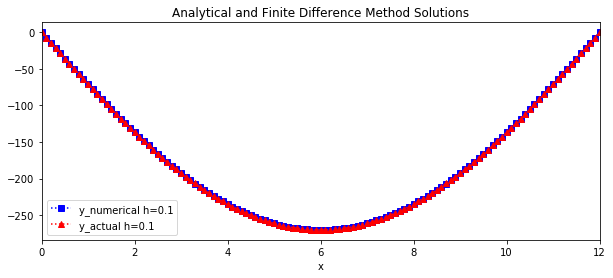

In [16]:

A = myfun_A(N1, 1, 1, 1, -2, 1 )
print(A)
b = np.zeros(N1+1)

for i in range (1,N1):
    b[i] = myfun_b(x1[i], h1)
print(b)
y_numerical = np.linalg.solve(A, b)

y_actual = myfun_yactual(x1)

fig = plt.figure(figsize=(10,4))

plt.plot(x1,y_numerical,'s:',color='blue',label='y_numerical h=%s'%(h1))
plt.plot(x1,y_actual,'^:',color='red',label='y_actual h=%s'%(h1))
plt.xlim((0,12))
plt.xlabel('x')
plt.legend(loc='best')
plt.title('Analytical and Finite Difference Method Solutions')

In [14]:
table = ListTable()
table.append(['x', 'y_numerical', 'y_actual'
              ])
tableSize = N1
for i in range (0,tableSize+1):
    table.append([round(x1[i],5), round(y_numerical[i],5), round(y_actual[i],5)])
    
table

x,y_numerical,y_actual
0.0,0.0,0.0
0.1,-7.1995,-7.199
0.2,-14.39305,-14.39207
0.3,-21.5748,-21.57334
0.4,-28.739,-28.73707
0.5,-35.88,-35.8776
0.6,-42.99225,-42.9894
0.7,-50.0703,-50.067
0.8,-57.1088,-57.10507
0.9,-64.1025,-64.09834
